O objetivo será criar um modelo que seja capaz de prever quando vai ocorrer uma fraude bancária.

Base de dados:
https://www.kaggle.com/code/zaidali11/fraud-detection-accuracy-99-eda-fe

In [ ]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Leitura do arquivo
base_dados = pd.read_csv("/content/drive/MyDrive/Analista de dados/creditcard.csv")
base_dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Verificar valores vazios
base_dados.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Percebe-se que como o arquivo já está com os dados tratados,podemos começar com modelo de inteligência artificial.

Algumas colunas como V1...V28 são dados normalizados, pois ,como é um dado bancário, têm que serem anonimatos para respeitar a lei da proteção de dados.

colunas não anonimatos:
#####Amont: valor transferido
#####class : 0 para não fraude ; 1 para fraude

In [ ]:
# Correlação das coluans

base_dados.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
# Apagando coluna Time

base_dados.drop("Time", axis = 1, inplace = True)
base_dados

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Estatística dos dados fraudados
base_dados[base_dados["Class"] == 1].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


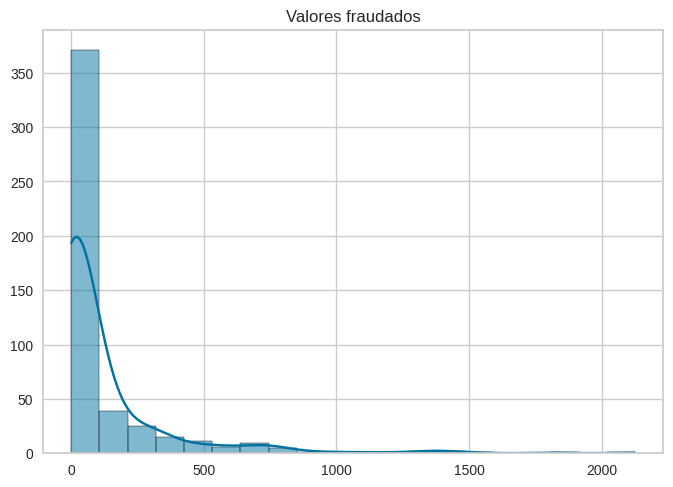

In [ ]:
# Analisando valores que são fraudados.
# Grande parte das transições fraudadas são de valores abaixo de 500

sns.histplot(base_dados[base_dados["Class"] == 1], x ="Amount", bins = 20, kde = True);
plt.xlabel("")
plt.ylabel("")
plt.title('Valores fraudados')
plt.show()

In [ ]:
# Verificando a quantidade de fraude
base_dados['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Quando observamos as quantidades de não fraudes e fraudes, percebemos que os valores desses dois estão totalmente distantes um do outro, ou seja, os modelos de previsão vão se prejudicarem por conta dessas diferenças enormes.

A solução para esse problema vai ser colocar a quantidade de não fraude a mesma da outra.

In [ ]:
# Importando a base de não fraude e colocando em uma quantidade de 492 linhas da base com fraude
base_com_fraude = base_dados[base_dados['Class'] == 1]
base_não_fraude = base_dados[base_dados['Class'] == 0].sample(492)
base_dados_novo = pd.concat([base_com_fraude,base_não_fraude], axis = 0)
base_dados_novo

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142699,-14.437893,-21.303731,0.437103,5.533202,20.861916,-9.077660,-13.971053,2.692586,1.338725,1.701294,...,1.589111,-1.686275,4.396532,0.941024,0.056053,0.282311,-0.569504,0.624014,154.17,0
107854,1.431472,-1.208909,0.551128,-1.498475,-1.620859,-0.419334,-1.227987,0.048467,-1.812644,1.603798,...,-0.335730,-0.763020,0.117089,-0.071320,0.098302,-0.406564,0.026630,0.018552,39.20,0
5680,1.314720,-1.086377,0.190779,-1.109512,-1.024409,-0.168426,-0.812310,-0.169001,-0.911188,1.089597,...,-0.230600,-0.018811,-0.126487,-0.010390,0.551450,-0.099676,-0.005979,0.002770,83.00,0
125265,-0.589496,1.348466,1.336875,0.079349,-0.130034,-1.176354,0.742407,-0.113080,-0.303861,-0.218531,...,-0.267573,-0.609479,0.026895,0.670796,-0.136091,0.054645,0.357068,0.162611,3.87,0


#Preparação do machine learning

In [ ]:
# Separando as classes e features.
x_feature = base_dados_novo.drop("Class", axis = 1).values
y_class = base_dados_novo['Class'].values

In [ ]:
# Separando os dados de treino e Teste
x_feature_train, x_feature_test, y_class_train, y_class_test = train_test_split(x_feature , y_class , test_size = 0.20 , random_state = 42, stratify=y_class)

print(x_feature_train.shape)
print(y_class_train.shape)

print("--"*20)

print(x_feature_test.shape)
print(y_class_test.shape)

(787, 29)
(787,)
----------------------------------------
(197, 29)
(197,)


# Modelo Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

# Criando e treinando o perceptron
perceptron = Perceptron()
perceptron.fit(x_feature_train, y_class_train)

# Fazendo previsões nos dados de teste
predictions = perceptron.predict(x_feature_test)

# Calculando a acurácia
accuracy = accuracy_score(y_class_test, predictions)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8071065989847716


              precision    recall  f1-score   support

           0       0.97      0.64      0.77        99
           1       0.73      0.98      0.83        98

    accuracy                           0.81       197
   macro avg       0.85      0.81      0.80       197
weighted avg       0.85      0.81      0.80       197



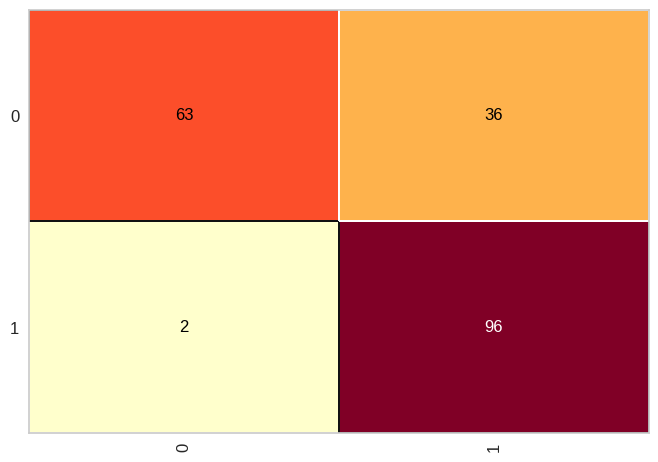

In [ ]:
# Gerando gráfico de confusão.
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

# Criando o objeto ConfusionMatrix
cn = ConfusionMatrix(perceptron)

# Ajustando o ConfusionMatrix ao conjunto de treinamento
cn.fit(x_feature_train, y_class_train)

# Avaliando o ConfusionMatrix no conjunto de teste e exibindo o gráfico
cn.score(x_feature_test, y_class_test)

# Exibindo o relatório de classificação
predictions = perceptron.predict(x_feature_test)
print(classification_report(y_class_test, predictions))

In [ ]:
# Utilizando a técnica do cross validation

# Defina o número de folds para a validação cruzada
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

# Aplique a validação cruzada usando cross_val_score
scores = cross_val_score(perceptron, x_feature, y_class, cv=kf, scoring='accuracy')

# Exiba as pontuações de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calcule a média das pontuações
mean_score = scores.mean()
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)

Fold 1: 0.93
Fold 2: 0.92
Fold 3: 0.93
Fold 4: 0.86
Fold 5: 0.90
----------------------------------------
Média das Pontuações: 0.91
----------------------------------------


#Regressão Logística

In [ ]:
# Iniciando modelo de regressão logística
from sklearn.linear_model import LogisticRegression

# Criar o modelo de regressão logística
logistic_regression = LogisticRegression(max_iter=1000)

# Treinar o modelo com os dados de treino
logistic_regression.fit(x_feature_train, y_class_train)

# Fazer previsões nos dados de teste
predict = logistic_regression.predict(x_feature_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_class_test, predict)
print(f"Acurácia do modelo de regressão logística: {accuracy:.2f}")

Acurácia do modelo de regressão logística: 0.97


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.98      0.96      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



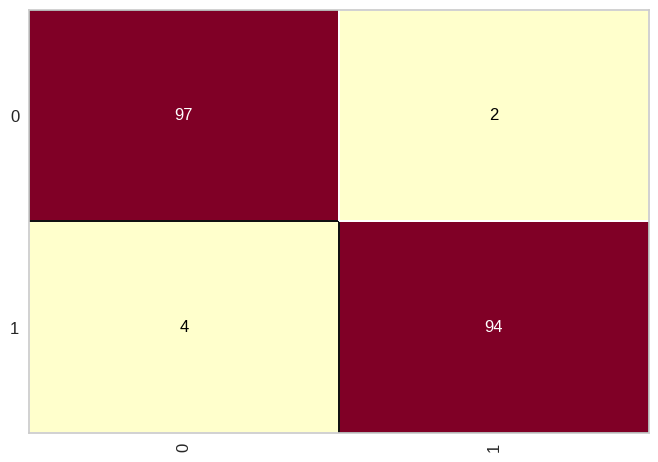

In [ ]:
# Criando o objeto ConfusionMatrix
cn = ConfusionMatrix(logistic_regression)

# Ajustando o ConfusionMatrix ao conjunto de treinamento
cn.fit(x_feature_train, y_class_train)

# Avaliando o ConfusionMatrix no conjunto de teste e exibindo o gráfico
cn.score(x_feature_test, y_class_test)

# Exibindo o relatório de classificação
predictions = logistic_regression.predict(x_feature_test)
print(classification_report(y_class_test, predictions))

In [ ]:
# Utilizando a técnica do cross validation

# Defina o número de folds para a validação cruzada
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

# Aplique a validação cruzada usando cross_val_score
scores = cross_val_score(logistic_regression, x_feature, y_class, cv=kf, scoring='accuracy')

# Exiba as pontuações de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calcule a média das pontuações
mean_score = scores.mean()
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)

Fold 1: 0.94
Fold 2: 0.94
Fold 3: 0.94
Fold 4: 0.93
Fold 5: 0.95
----------------------------------------
Média das Pontuações: 0.94
----------------------------------------


# Modelo Redes Neurais Artificiais (ANN)

In [ ]:
# Iniciando modelo de ANN
from sklearn.neural_network import MLPClassifier

# Criar o modelo de classificação com rede neural
ANN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinar o modelo
ANN.fit(x_feature_train, y_class_train)

# Fazer previsões
predictions = ANN.predict(x_feature_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_class_test, predictions)
print("Acurácia do modelo de classificação:", accuracy)

Acurácia do modelo de classificação: 0.9543147208121827


              precision    recall  f1-score   support

           0       0.97      0.94      0.95        99
           1       0.94      0.97      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



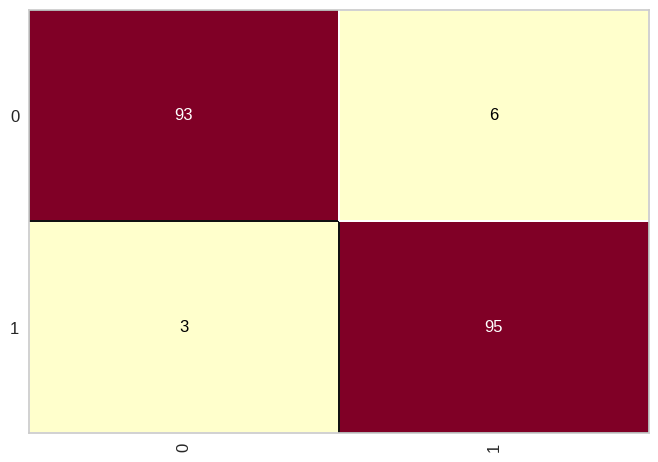

In [ ]:
# Criando o objeto ConfusionMatrix
cn = ConfusionMatrix(ANN)

# Ajustando o ConfusionMatrix ao conjunto de treinamento
cn.fit(x_feature_train, y_class_train)

# Avaliando o ConfusionMatrix no conjunto de teste e exibindo o gráfico
cn.score(x_feature_test, y_class_test)

# Exibindo o relatório de classificação
predictions = ANN.predict(x_feature_test)
print(classification_report(y_class_test, predictions))

In [ ]:
# Utilizando a técnica do cross validation

# Defina o número de folds para a validação cruzada
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

# Aplique a validação cruzada usando cross_val_score
scores = cross_val_score(ANN, x_feature, y_class, cv=kf, scoring='accuracy')

# Exiba as pontuações de cada fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calcule a média das pontuações
mean_score = scores.mean()
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)

Fold 1: 0.94
Fold 2: 0.94
Fold 3: 0.95
Fold 4: 0.94
Fold 5: 0.94
----------------------------------------
Média das Pontuações: 0.95
----------------------------------------


#FINALIZAÇÃO

O principal objetivo desse projeto é criar um modelo de inteligência artificial que seja capaz de deduzir quando que uma transação vai ser fraude. Nesse sentido, o modelo mais ideal será de Regressão Logística.


####Modelo Perceptron: 80% de eficiência
####Modelo Regressão Logística: 97% de eficiência
####Modelo Redes Neurais Artificiais (ANN) : 95% de eficiência